In [ ]:
# x1x2filename = "x1x2_correlations.csv"
x1x2filename = "pearson_x1x2_correlations.csv"

In [ ]:
#!pip install python-igraph

In [ ]:
#!pip install geopandas

## Imports

In [ ]:
import geopandas as gpd
import os
from shapely.geometry import Point
from igraph import *
import numpy
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from matplotlib import pyplot as plt

In [ ]:
"""##Data Source

http://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2018/UFs/
"""

sp = gpd.read_file('35MUE250GC_SIR.shp')

type(sp)

geopandas.geodataframe.GeoDataFrame

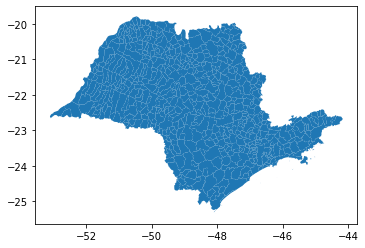

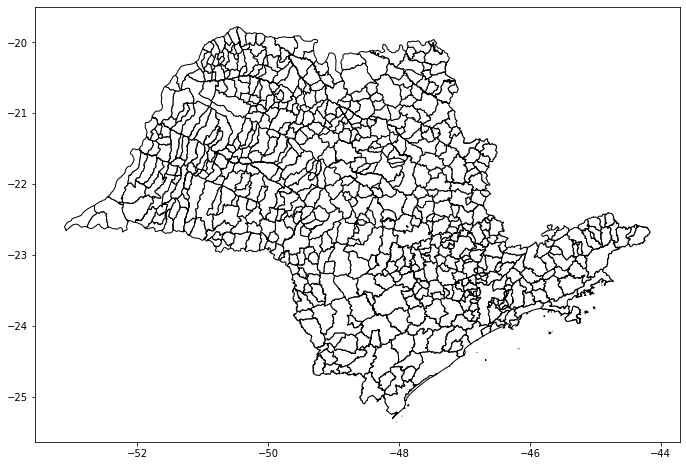

In [ ]:
sp.plot()
sp.plot(color='white', edgecolor='black', figsize=(15,8))

Shapefile of Sao Jose dos Campos city

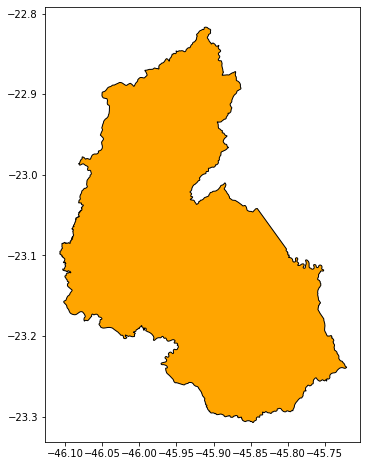

In [ ]:
sp = sp[sp['NM_MUNICIP'] == 'SÃO JOSÉ DOS CAMPOS']
sp.shape

sp.plot(color='orange', edgecolor='black', figsize=(15,8))

Saving shapefile

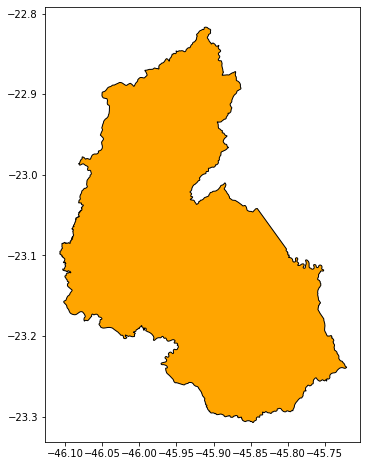

In [ ]:
dir = '../01.Dados/Mapas/SP-MUNIC'
if not os.path.exists(dir): 
    os.makedirs(dir)

sp.to_file(dir + '/SP-MUNIC.shp')

sjc = gpd.read_file(dir + '/SP-MUNIC.shp')

sjc.plot(color='orange', edgecolor='black', figsize=(15,8))

Transforming DataFrame into GeoDataFrame

In [ ]:
data = pd.read_csv("zones_coordinates.csv", encoding = "ISO-8859-1")

data

,Nome_ZT,XCOORD,YCOORD
0,Centro,-45.886701,-23.190638
1,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009
2,Jardim Paulista e Monte Castelo,-45.873745,-23.182939
3,Vila São Pedro e Jardim Jussara,-45.869327,-23.188904
4,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879
5,Vila Adyanna e Vila Betânia,-45.892252,-23.203218
6,Vila Ema e Jardim Esplanada,-45.902175,-23.199704
7,Santana e Vila Rossi,-45.898069,-23.165302
8,Vila Industrial e VilaTatetuba,-45.857077,-23.180798
9,Jardim da Granja e Jardim Souto,-45.858072,-23.202252


Creating geometry column

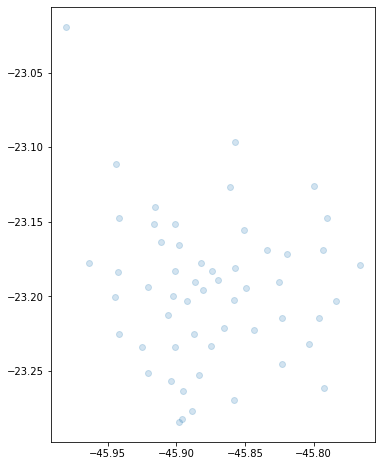

In [ ]:
from shapely.geometry import Point

x =  zip(data.XCOORD, data.YCOORD)

geometry = [Point(x) for x in zip(data.XCOORD, data.YCOORD)]

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_data = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

dir = '../01.Dados/Mapas/SP-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

geo_data.to_file(dir + '/DATASET.shp')

geo_data.plot(figsize=(15,8), alpha=0.2)

Modifying CRS from Files

In [ ]:
sjc = gpd.read_file('../01.Dados/Mapas/SP-MUNIC/SP-MUNIC.shp')
geo_data = gpd.read_file('../01.Dados/Mapas/SP-DATASET/DATASET.shp')

print(sjc.crs)
print(geo_data.crs)

epsg:4674
GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [ ]:
sjc = sjc.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
geo_data = geo_data.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

sjc.to_file('../01.Dados/Mapas/SP-MUNIC/SP-MUNIC.shp')
geo_data.to_file('../01.Dados/Mapas/SP-DATASET/DATASET.shp')

sjc2 = gpd.read_file('../01.Dados/Mapas/SP-MUNIC/SP-MUNIC.shp')
geo_data2 = gpd.read_file('../01.Dados/Mapas/SP-DATASET/DATASET.shp')

print(sjc2.crs)

geo_data2

PROJCS["unknown",GEOGCS["GCS_unknown",DATUM["D_Unknown_based_on_GRS80_ellipsoid_using_towgs84_0_0_0_0_0_0_0",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-45],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500],PARAMETER["false_northing",10000],UNIT["kilometre",1000],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,Nome_ZT,XCOORD,YCOORD,geometry
0,Centro,-45.886701,-23.190638,POINT (409.255 7435.100)
1,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009,POINT (409.721 7436.501)
2,Jardim Paulista e Monte Castelo,-45.873745,-23.182939,POINT (410.576 7435.960)
3,Vila São Pedro e Jardim Jussara,-45.869327,-23.188904,POINT (411.032 7435.303)
4,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879,POINT (409.908 7434.524)
5,Vila Adyanna e Vila Betânia,-45.892252,-23.203218,POINT (408.696 7433.704)
6,Vila Ema e Jardim Esplanada,-45.902175,-23.199704,POINT (407.678 7434.086)
7,Santana e Vila Rossi,-45.898069,-23.165302,POINT (408.074 7437.898)
8,Vila Industrial e VilaTatetuba,-45.857077,-23.180798,POINT (412.281 7436.207)
9,Jardim da Granja e Jardim Souto,-45.858072,-23.202252,POINT (412.193 7433.832)


Plotting layers, one over another

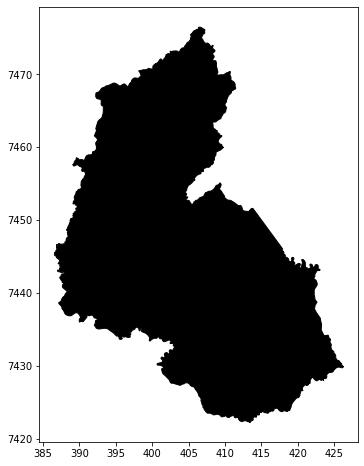

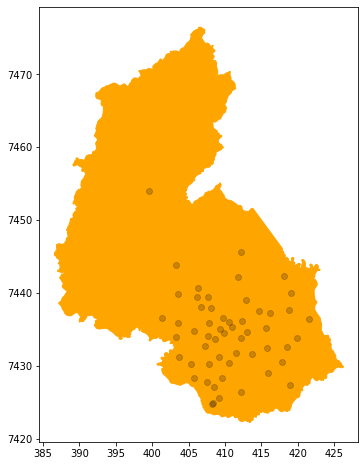

In [ ]:
sjc = gpd.read_file('../01.Dados/Mapas/SP-MUNIC/SP-MUNIC.shp')
geo_data = gpd.read_file('../01.Dados/Mapas/SP-DATASET/DATASET.shp')

base = sjc.plot(color='black', edgecolor='black', figsize=(15,8))

base = sjc.plot(color='orange', edgecolor='orange', figsize=(15,8))
geo_data.plot(ax=base, figsize=(15,8), color='black', alpha=0.2)

Filtering points, only which one inside the base should be plotted

In [ ]:
print(sjc.iloc[0].geometry)
print(geo_data.iloc[0].geometry)

print(geo_data.iloc[0].geometry.within(sjc.iloc[0].geometry))

print(sjc.iloc[0].geometry.contains(geo_data.iloc[0].geometry))

print(geo_data['geometry'].within(sjc.iloc[0].geometry))

sample_geo_data = geo_data.iloc[0:12]
sample_geo_data

POLYGON ((422.14922456671206 7442.047146457194, 422.14398943910123 7442.031230763948, 422.1478036193907 7442.006672737351, 422.1568142898615 7441.987013095801, 422.1914613605696 7441.940362776213, 422.21994038084966 7441.9180367427525, 422.2673842247399 7441.911087548908, 422.29211080241237 7441.9014736474965, 422.33256637020446 7441.860056673132, 422.35239195760795 7441.847760113025, 422.38635064750105 7441.83487272531, 422.4072242060957 7441.817931668257, 422.43451420609995 7441.748436061378, 422.44802483446404 7441.729685321527, 422.4960924217997 7441.681332650205, 422.509211173559 7441.659147774838, 422.51296767969035 7441.625843178332, 422.5041431734956 7441.590037638152, 422.50252555919593 7441.566337028543, 422.50762688521917 7441.530382339569, 422.5287407177586 7441.486760953829, 422.57885595984504 7441.418490632678, 422.58343615140615 7441.404011205787, 422.57983272940805 7441.368343486706, 422.590212517487 7441.341162333772, 422.5873487603051 7441.301069997528, 422.5811997079

,Nome_ZT,XCOORD,YCOORD,geometry
0,Centro,-45.886701,-23.190638,POINT (409.255 7435.100)
1,Vila Maria e Vila Santa Luzia,-45.882070,-23.178009,POINT (409.721 7436.501)
2,Jardim Paulista e Monte Castelo,-45.873745,-23.182939,POINT (410.576 7435.960)
3,Vila São Pedro e Jardim Jussara,-45.869327,-23.188904,POINT (411.032 7435.303)
4,Vila Piratininga e Jardim Augusta,-45.880360,-23.195879,POINT (409.908 7434.524)
5,Vila Adyanna e Vila Betânia,-45.892252,-23.203218,POINT (408.696 7433.704)
6,Vila Ema e Jardim Esplanada,-45.902175,-23.199704,POINT (407.678 7434.086)
7,Santana e Vila Rossi,-45.898069,-23.165302,POINT (408.074 7437.898)
8,Vila Industrial e VilaTatetuba,-45.857077,-23.180798,POINT (412.281 7436.207)
9,Jardim da Granja e Jardim Souto,-45.858072,-23.202252,POINT (412.193 7433.832)


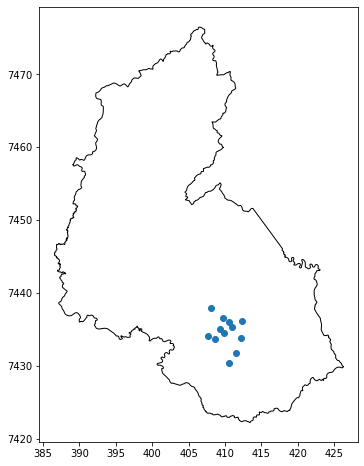

In [ ]:
sample = geo_data.iloc[:12]
base = sjc.plot(color='white', edgecolor='black', figsize=(15,8))
sample.plot(ax=base, figsize=(15,8), alpha=1)

In [ ]:
before = geo_data.shape[0]
print(before)

55


In [ ]:
geo_data = geo_data[geo_data['geometry'].within(sjc.iloc[0].geometry)]
print(geo_data)

                                          Nome_ZT     XCOORD     YCOORD  \
0                                          Centro -45.886701 -23.190638   
1                   Vila Maria e Vila Santa Luzia -45.882070 -23.178009   
2                 Jardim Paulista e Monte Castelo -45.873745 -23.182939   
3                 Vila São Pedro e Jardim Jussara -45.869327 -23.188904   
4               Vila Piratininga e Jardim Augusta -45.880360 -23.195879   
5                     Vila Adyanna e Vila Betânia -45.892252 -23.203218   
6                     Vila Ema e Jardim Esplanada -45.902175 -23.199704   
7                            Santana e Vila Rossi -45.898069 -23.165302   
8                  Vila Industrial e VilaTatetuba -45.857077 -23.180798   
9                 Jardim da Granja e Jardim Souto -45.858072 -23.202252   
10                                     CTA e INPE -45.865457 -23.221472   
11           Vila Nova Conceição e Vila São Bento -45.874820 -23.233271   
12          Jardim Satlit

In [ ]:
after = geo_data.shape[0]

before-after

0

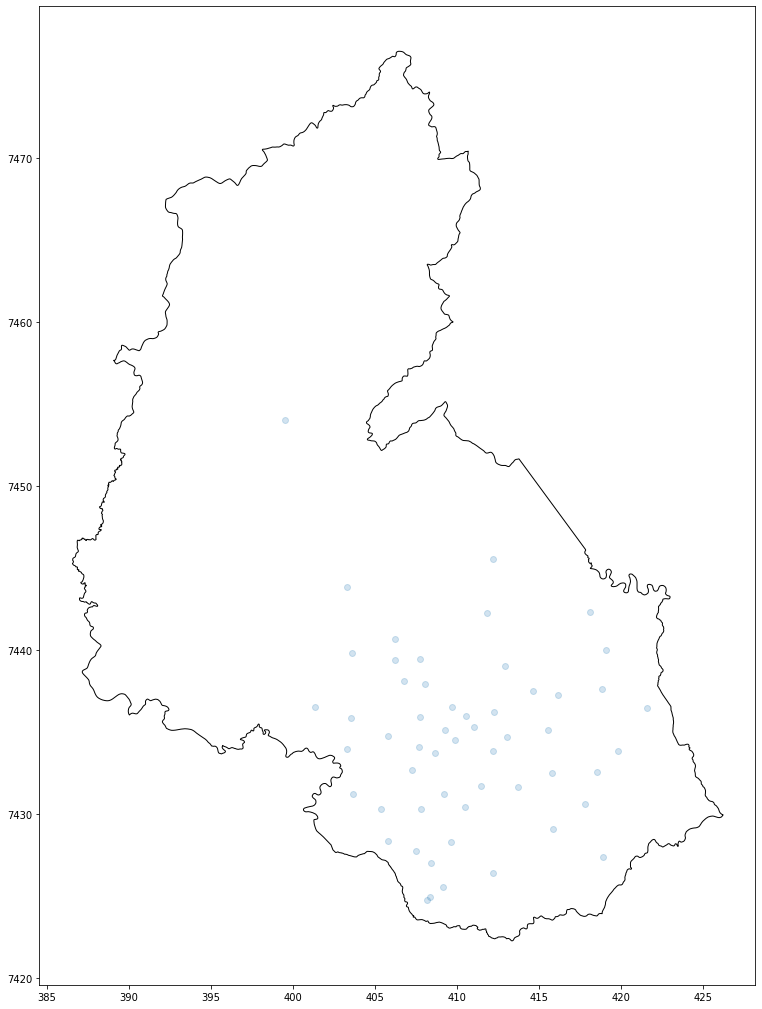

In [ ]:
base = sjc.plot(color='white', edgecolor='black', figsize=(25,18))
geo_data.plot(ax=base, figsize=(25,18), alpha=0.2)

geo_data.to_file('../01.Dados/Mapas/SP-DATASET/DATASET.shp')


Reading x1x2_correlation.csv

In [ ]:
def calculate_correlation_with_limiar_x(limiar):
  correlation_dataframe = pd.read_csv(x1x2filename, encoding = "ISO-8859-1")
  
  correlation_dataframe = correlation_dataframe[correlation_dataframe['corr'] > limiar]
    
  correlation_dataframe = correlation_dataframe.reset_index(drop=True)
  correlation_dataframe = correlation_dataframe.astype({"X1": int, "X2": int})
    
  return correlation_dataframe

In [ ]:
#Creating our graph
def create_graph(limiar):
  correlation_dataframe = calculate_correlation_with_limiar_x(limiar)

  g = Graph()
  g.add_vertices(56)

  #Adding edges to the graph
  lista = [tuple(r) for r in correlation_dataframe[['X1', 'X2']].values]
  
  g.add_edges(lista)
  return g


def calculate_avg_eccentricity(g):
  return sum(g.eccentricity(vertices=None, mode=IN))/len(g.vs)

In [ ]:
max_diam = 0.0
max_limiar_diam = 0.9

list_of_metrics = []

for i in numpy.arange(0, 1, 0.025):
    limiar = round(i, 2)
    g = create_graph(limiar)
    
    diam = g.diameter(directed=False, unconn=True, weights=None)

    if(diam > max_diam):
        max_diam = diam
        max_limiar_diam = limiar

    list_of_metrics.append(tuple((limiar, calculate_avg_eccentricity(g), g.average_path_length(directed=True, unconn=True),
                                  g.transitivity_undirected(mode="nan"),
                                  round(mean(g.degree()), 4), g.vcount(), g.ecount(), 
                                  diam, 
                                  len(g.clusters(mode=STRONG)))))

#g = create_graph(round(0, 2))

g = create_graph(max_limiar_diam)

list_degree_max_diam = g.vs.degree()

metrics = pd.DataFrame(list_of_metrics, columns = ['Limiar', 'avg_eccentricity', 'avg_path_len', 'transitivity' ,'avg_degree', 'num_nodes', 'num_edges', 'diameter', 'clusters'])
print(metrics)

metrics.to_csv('metrics.csv')

<ipython-input-180-5d7fe2a59ca0>:20: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  len(g.clusters(mode=STRONG)))))


    Limiar  avg_eccentricity  avg_path_len  transitivity  avg_degree  \
0     0.00          0.892857      1.000000      1.000000     43.7500   
1     0.02          0.892857      1.000000      1.000000     43.7500   
2     0.05          0.946429      1.001633      0.998396     43.6786   
3     0.08          1.017857      1.006531      0.993815     43.4643   
4     0.10          1.089286      1.010612      0.990136     43.2857   
5     0.12          1.178571      1.018776      0.983646     42.9286   
6     0.15          1.250000      1.034286      0.972462     42.2500   
7     0.18          1.357143      1.046531      0.965534     41.7143   
8     0.20          1.482143      1.057959      0.961029     41.2143   
9     0.22          1.625000      1.080000      0.956793     40.2500   
10    0.25          1.785714      1.117551      0.959099     38.6071   
11    0.28          1.821429      1.137143      0.965045     37.7857   
12    0.30          2.035714      1.164898      0.973349     37.

In [ ]:
limiar = metrics[['Limiar']]

metrics_to_plot = metrics[['avg_eccentricity', 'avg_path_len','transitivity', 'diameter']]
metrics2_to_plot = metrics[['avg_degree', 'clusters']]

metrics_to_plot = pd.concat([limiar, metrics_to_plot], axis=1)
metrics_to_plot2 = pd.concat([limiar, metrics2_to_plot], axis=1)
# metrics_to_plot

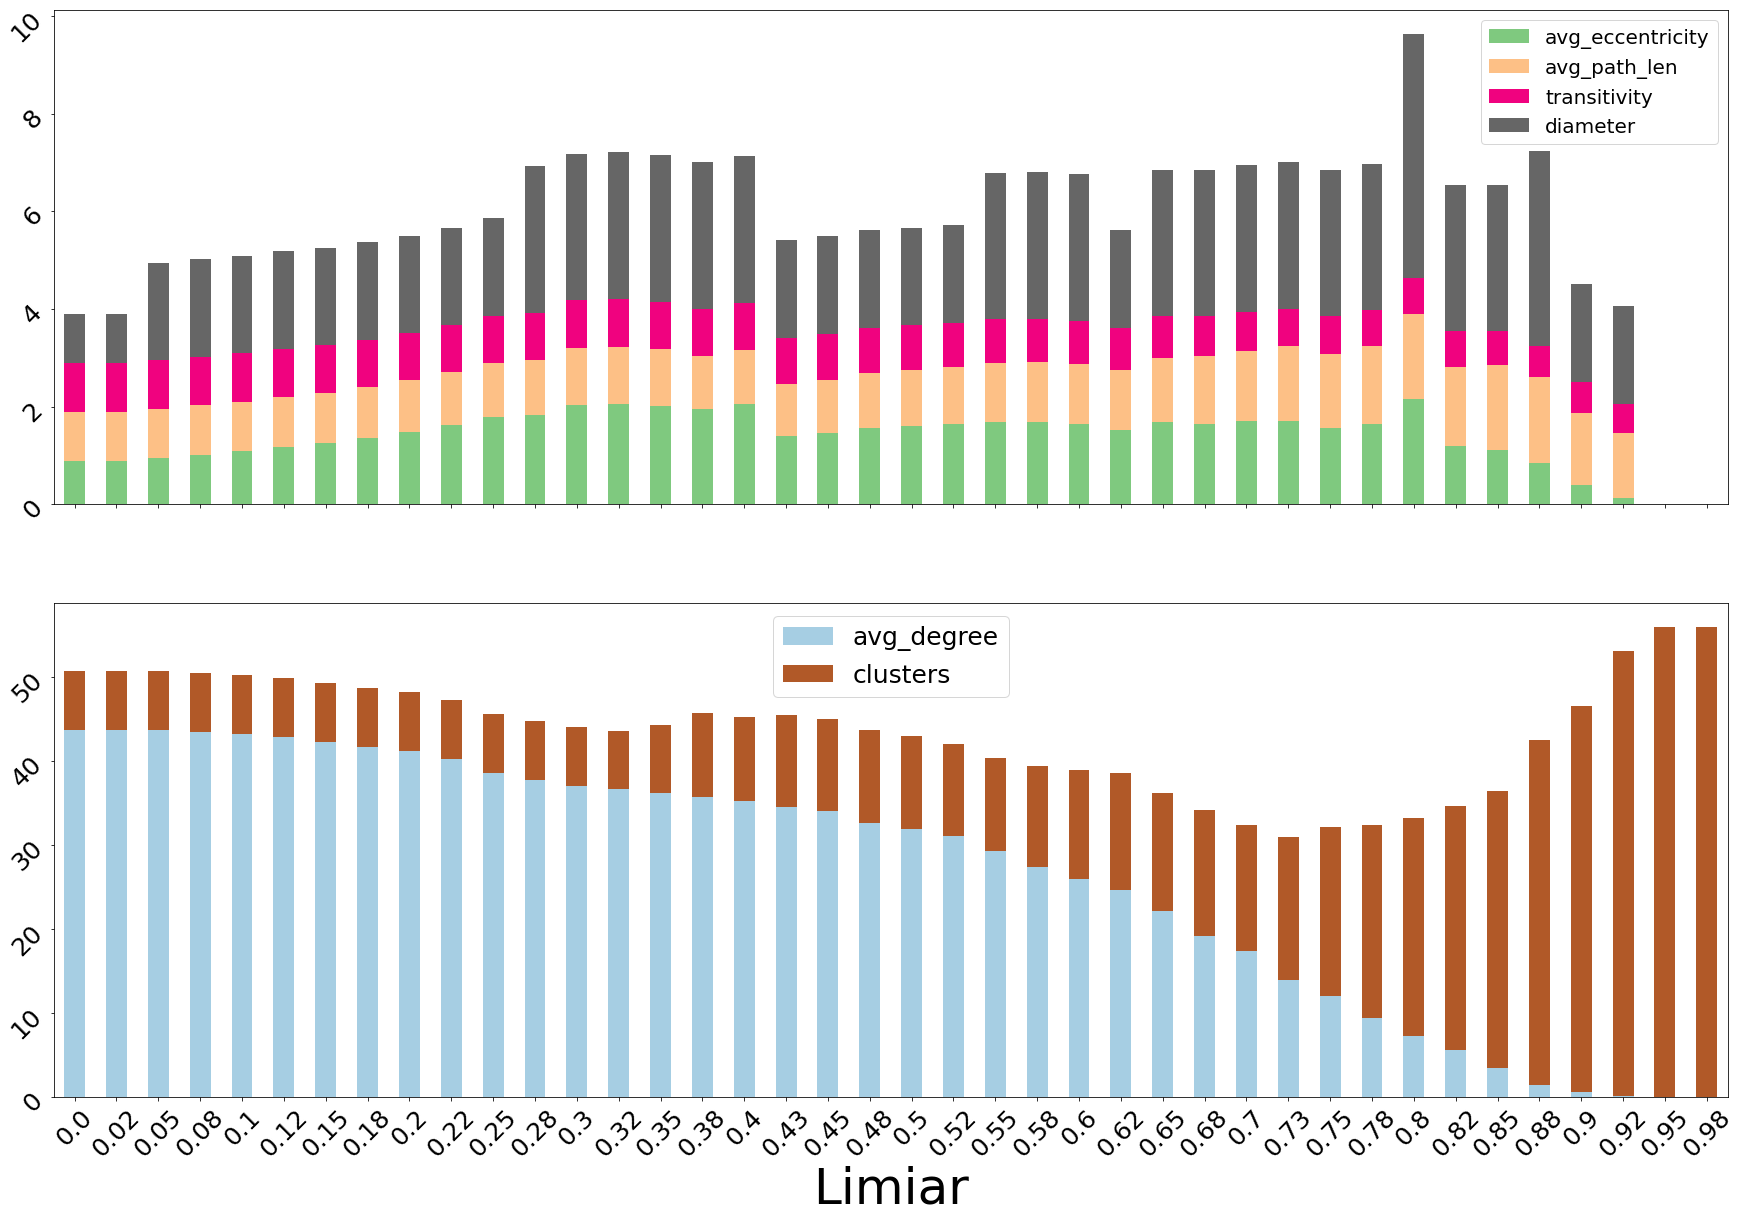

In [ ]:
fig, axs = plt.subplots(2, sharex=True)

#http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
ax1 = metrics_to_plot.plot.bar(ax=axs[0], x = 'Limiar', rot=0, figsize=(30,20), stacked=True, colormap='Accent')
ax1.legend(loc='best', fontsize=20)

ax2 = metrics_to_plot2.plot.bar(ax=axs[1], x = 'Limiar', rot=0, figsize=(30,20), stacked=True,  colormap='Paired')
ax2.legend(loc='best', fontsize=20)

plt.xlabel('Limiar', fontsize=50)

plt.setp(ax1.get_xticklabels(), rotation='45', fontsize=25)
plt.setp(ax1.get_yticklabels(), rotation='45', fontsize=25)

plt.setp(ax2.get_xticklabels(), rotation='45', fontsize=25)
plt.setp(ax2.get_yticklabels(), rotation='45', fontsize=25)

leg = plt.legend(fontsize=25)

plt.savefig('metrics.pdf')
plt.show()

In [ ]:
correlations = calculate_correlation_with_limiar_x(max_limiar_diam)
correlations = correlations.astype({"X1": int, "X2": int})

correlations['X1Coord'] = correlations['X1'].apply(lambda x: geo_data.iloc[x-1, 3])
correlations['X2Coord'] = correlations['X2'].apply(lambda x: geo_data.iloc[x-1, 3])
correlations

,X1,X2,corr,X1Coord,X2Coord
0,1,4,0.806739,POINT (409.25512401047 7435.099883910317),POINT (411.0321257948857 7435.30258836438)
1,1,9,0.801583,POINT (409.25512401047 7435.099883910317),POINT (412.2805840327007 7436.2074491844905)
2,1,10,0.805484,POINT (409.25512401047 7435.099883910317),POINT (412.19275256640054 7433.831654905096)
3,1,31,0.811057,POINT (409.25512401047 7435.099883910317),POINT (405.80150149363106 7428.337640669276)
4,1,44,0.800577,POINT (409.25512401047 7435.099883910317),POINT (419.8478997374959 7433.809978895611)
...,...,...,...,...,...
199,38,44,0.834437,POINT (406.25881564922514 7440.653779717027),POINT (419.8478997374959 7433.809978895611)
200,42,44,0.915627,POINT (419.07810186042053 7439.957123951482),POINT (419.8478997374959 7433.809978895611)
201,42,45,0.803316,POINT (419.07810186042053 7439.957123951482),POINT (421.57817288281547 7436.4607945932785)
202,43,44,0.858766,POINT (418.8419288252762 7437.583824254926),POINT (419.8478997374959 7433.809978895611)


In [ ]:
y =  zip(correlations.X1Coord, correlations.X2Coord)
y

In [ ]:
geometry = [LineString(xy) for xy in zip(correlations.X1Coord, correlations.X2Coord)]

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_data_correlations = gpd.GeoDataFrame(correlations, crs = crs, geometry = geometry)
print(geo_data_correlations)

print(geo_data_correlations.crs)

geo_data_correlations = geo_data_correlations[['X1','X2','geometry']]
type(geo_data_correlations)

     X1  X2      corr                                       X1Coord  \
0     1   4  0.806739     POINT (409.25512401047 7435.099883910317)   
1     1   9  0.801583     POINT (409.25512401047 7435.099883910317)   
2     1  10  0.805484     POINT (409.25512401047 7435.099883910317)   
3     1  31  0.811057     POINT (409.25512401047 7435.099883910317)   
4     1  44  0.800577     POINT (409.25512401047 7435.099883910317)   
..   ..  ..       ...                                           ...   
199  38  44  0.834437  POINT (406.25881564922514 7440.653779717027)   
200  42  44  0.915627  POINT (419.07810186042053 7439.957123951482)   
201  42  45  0.803316  POINT (419.07810186042053 7439.957123951482)   
202  43  44  0.858766   POINT (418.8419288252762 7437.583824254926)   
203  44  45  0.839570   POINT (419.8478997374959 7433.809978895611)   

                                           X2Coord  \
0       POINT (411.0321257948857 7435.30258836438)   
1     POINT (412.2805840327007 7436.207

geopandas.geodataframe.GeoDataFrame

In [ ]:
dir = '01.Dados/Mapas/SP-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

geo_data_correlations.to_file(dir + '/DATASET_CORRELATIONS.shp')

**Plotting** layers

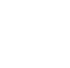

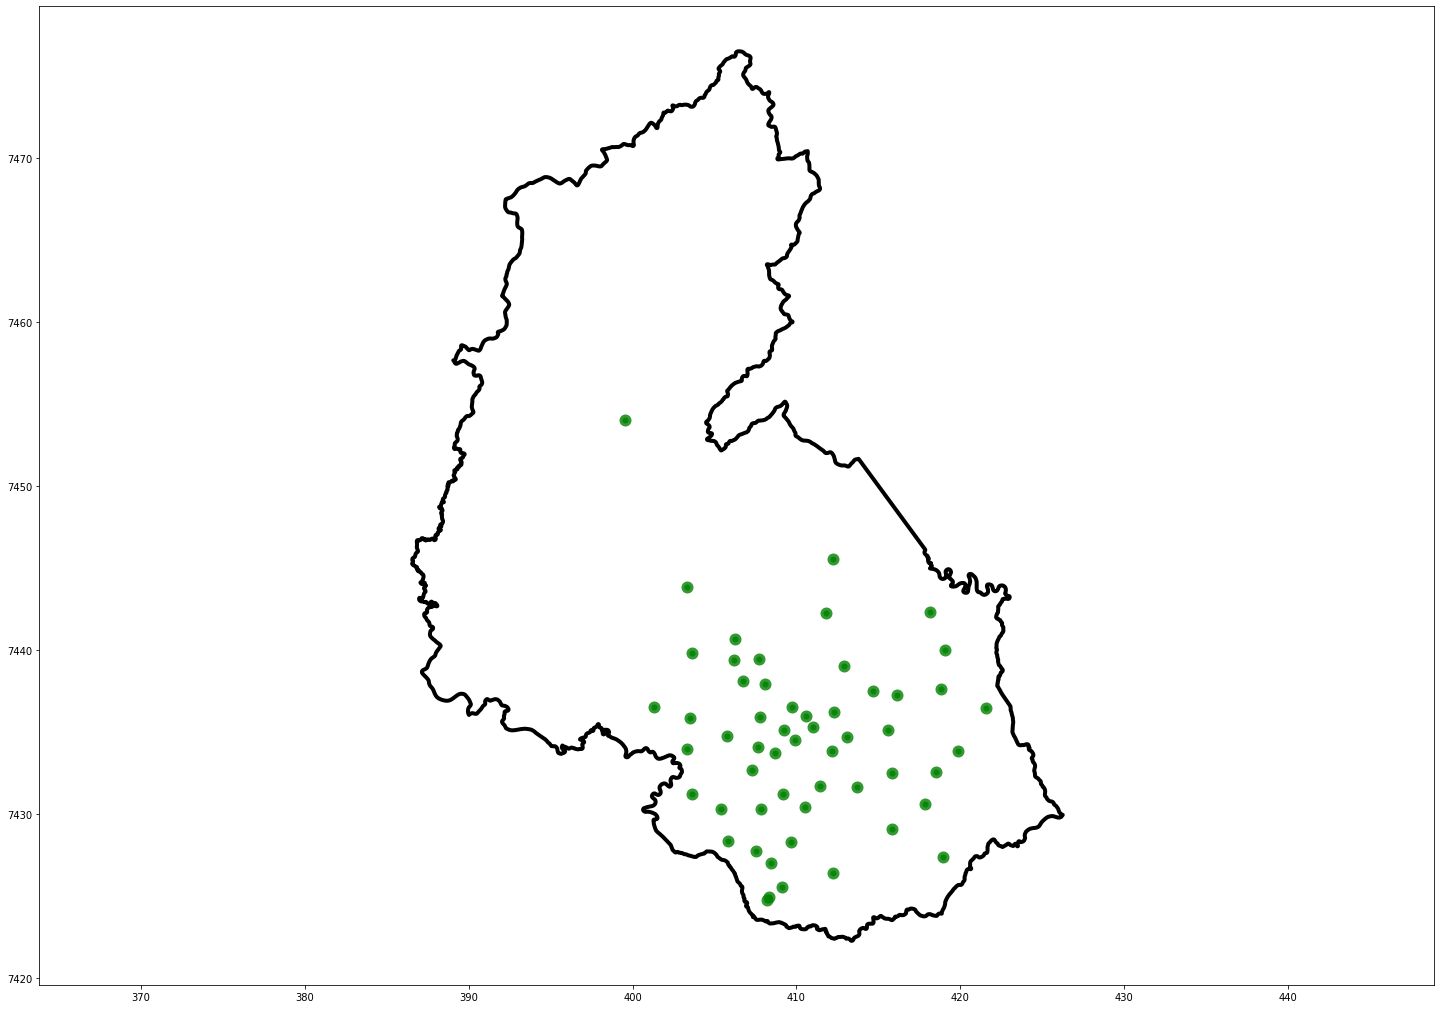

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(1, 1))
# Add tidal water (remove boundary lines for the polygons)

base = sjc.plot(color='white', edgecolor='black', figsize=(25,18), linewidth=4)
geo_data.plot(ax=base, color='green', figsize=(25,18), alpha=0.8, linewidth=6)
geo_data_correlations.plot(ax=base, color='blue', figsize=(25,18), alpha=0.2, linewidth=3)

# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')

plt.savefig('sjc09.png')
plt.savefig('sjc09.pdf')

# Display
plt.show()

Generating several images for each limiar

In [ ]:
list_of_metrics = []

for i in numpy.arange(0, 1, 0.2):
  limiar = round(i, 2)
  g = create_graph(limiar)
  diam = g.diameter(directed=False, unconn=True, weights=None)

  list_of_metrics.append(tuple((limiar, calculate_avg_eccentricity(g), g.average_path_length(directed=True, unconn=True),
                                  g.transitivity_undirected(mode="nan"),
                                  round(mean(g.degree()), 4), g.vcount(), g.ecount(), 
                                  diam, 
                                  len(g.clusters(mode=STRONG)))))

# Create the pandas DataFrame 
metrics = pd.DataFrame(list_of_metrics, columns = ['Limiar', 'avg_eccentricity', 'avg_path_len', 'transitivity' ,'avg_degree', 'num_nodes', 'num_edges', 'diameter', 'clusters'])
metrics

<ipython-input-197-8f9203d98669>:12: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  len(g.clusters(mode=STRONG)))))


,Limiar,avg_eccentricity,avg_path_len,transitivity,avg_degree,num_nodes,num_edges,diameter,clusters
0,0.0,0.892857,1.000000,1.000000,43.7500,56,1225,1,7
1,0.2,1.482143,1.057959,0.961029,41.2143,56,1154,2,7
2,0.4,2.053571,1.104533,0.964214,35.2857,56,988,3,10
3,0.6,1.642857,1.233615,0.876284,26.0000,56,728,3,13
4,0.8,2.160714,1.744086,0.731361,7.2857,56,204,5,26


Calculating correlations


In [ ]:
count=0
for i in numpy.arange(0, 1, 0.01):
  correlations = calculate_correlation_with_limiar_x(i)
  correlations = correlations.astype({"X1": int, "X2": int})

  correlations['X1Coord'] = correlations['X1'].apply(lambda x: geo_data.iloc[x-1, 3])
  correlations['X2Coord'] = correlations['X2'].apply(lambda x: geo_data.iloc[x-1, 3])
  correlations

In [ ]:
from shapely.geometry import LineString

y =  zip(correlations.X1Coord, correlations.X2Coord)

geometry = [LineString(xy) for xy in zip(correlations.X1Coord, correlations.X2Coord)]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_data_correlations = gpd.GeoDataFrame(correlations, crs = crs, geometry = geometry)
geo_data_correlations = geo_data_correlations[['X1','X2','geometry']]


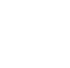

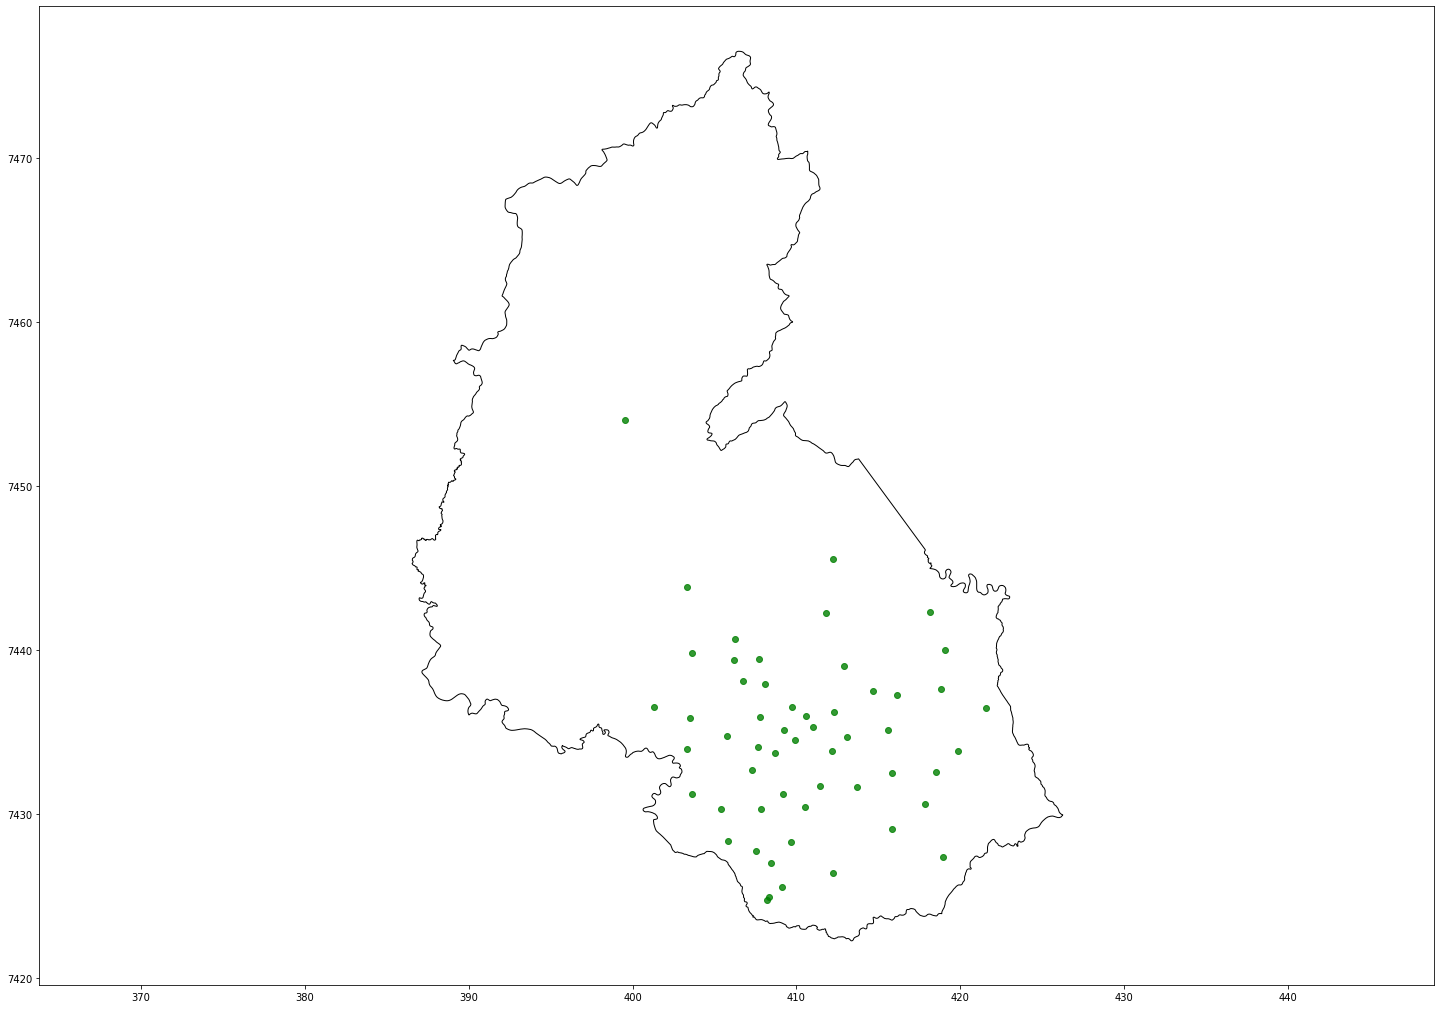

In [ ]:
dir = '01.Dados/Mapas/SP-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

geo_data_correlations.to_file(dir + '/DATASET_CORRELATIONS'+str(count)+'.shp')

from matplotlib import pyplot as plt
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(1, 1))
# Add tidal water (remove boundary lines for the polygons)

base = sjc.plot(color='white', edgecolor='black', figsize=(25,18))
geo_data_correlations.plot(ax=base, color='blue', figsize=(25,18), alpha=0.2)
geo_data.plot(ax=base, color='green', figsize=(25,18), alpha=0.8)

# Remove axes
ax.set_axis_off()
# Impose same size for units across axes
plt.axis('equal')

plt.savefig('sjc'+str(count)+'.png')
count+=1